In [9]:
#Comman TO ALL classification Techniques
#unzip the file 
#importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing




In [10]:
#Load Data
data = pd.read_csv("creditcard.csv")


In [11]:
#data info
print(data.head())
print(data.describe())
print(data.shape)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [12]:
frauds = data[data["Class"] == 1]
valids = data[data["Class"] == 0]

outlierFRAC = len(frauds)/ (float)(len(valids))
print("Outlier Fraction : ",outlierFRAC)
print("Frauds:",len(frauds))
print("Valids:",len(valids))

if ( outlierFRAC > 0.1):
  data = pd.DataFrame(preprocessing.normalize(data))


print("\n\nAmount details of the fraudulent transaction\n", frauds.Amount.describe() )
print("\n\nAmount details of the Valid transaction\n", valids.Amount.describe() )

Outlier Fraction :  0.0017304750013189597
Frauds: 492
Valids: 284315


Amount details of the fraudulent transaction
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Amount details of the Valid transaction
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


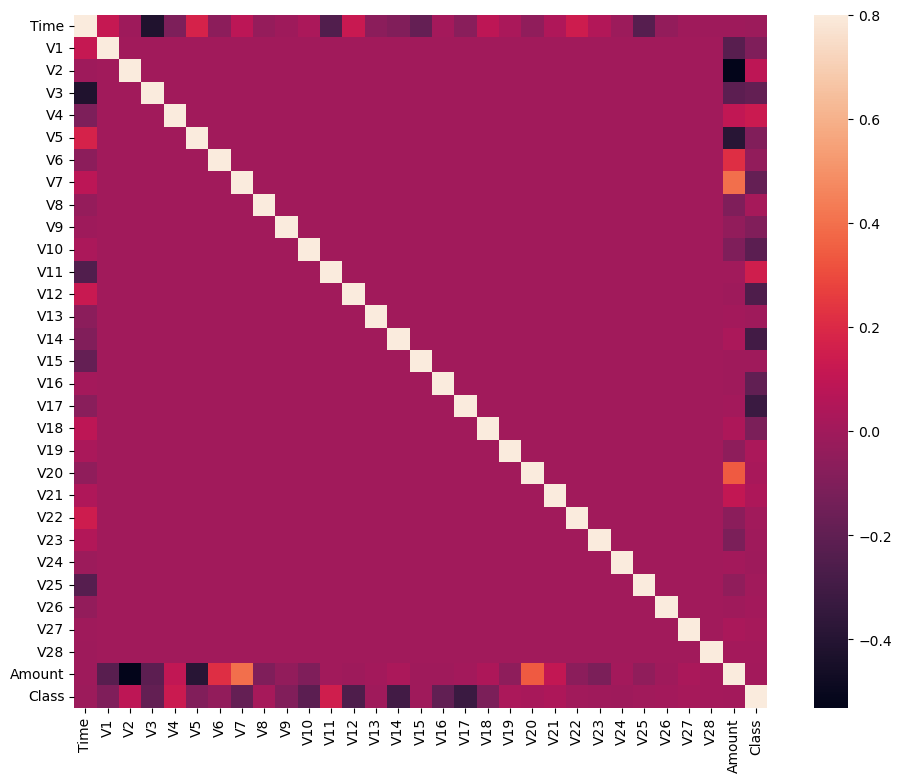

In [13]:

# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [14]:

# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values




(284807, 30)
(284807,)


In [15]:
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 39)

 Comman For All Approaches

![WhatsApp Image 2023-10-27 at 10.56.33 PM.jpeg](<attachment:WhatsApp Image 2023-10-27 at 10.56.33 PM.jpeg>)
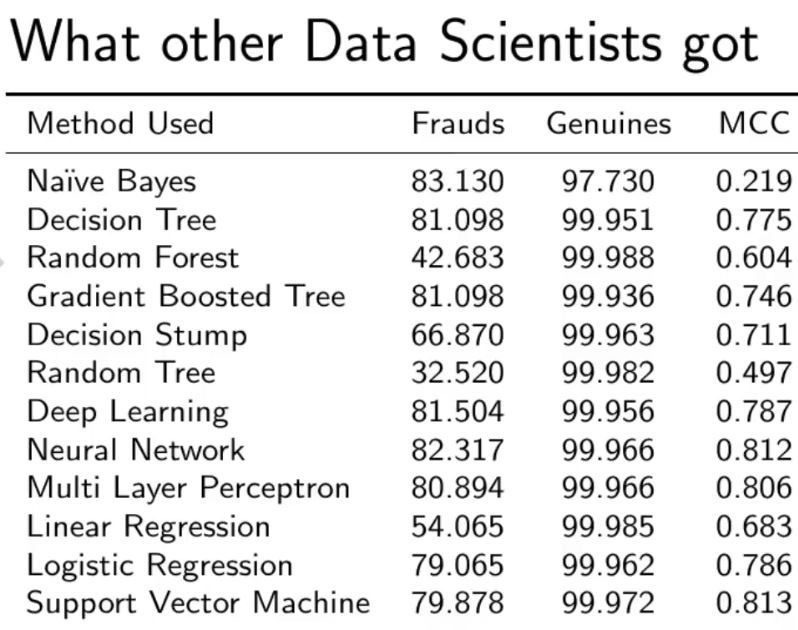

⭕**1. RANDOM FOREST:**

In [16]:
RFC = RandomForestClassifier()
RFC.fit(xTrain,yTrain)
ypredicted = RFC.predict(xTest)


In [17]:
acc_rf = accuracy_score(yTest, ypredicted) 
print("The accuracy is {}".format(acc_rf)) 
  
rf_prec = precision_score(yTest, ypredicted) 
print("The precision is {}".format(prec)) 
  
rf_rec = recall_score(yTest, ypredicted) 
print("The recall is {}".format(rec)) 
  
rf_f1 = f1_score(yTest, ypredicted) 
print("The F1-Score is {}".format(f1)) 

The accuracy is 0.9995786664794073
The precision is 0.9615384615384616
The recall is 0.78125
The F1-Score is 0.8620689655172413


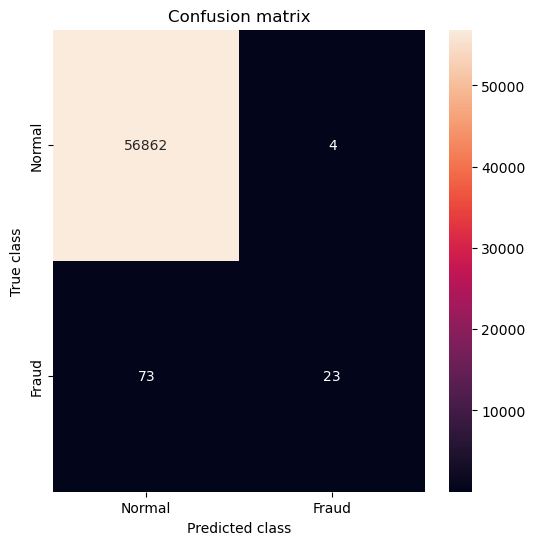

In [36]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, ypredicted) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

⭕**2. SUPPORT VECTOR MACHINE (svm):**

In [19]:
from sklearn import svm

clf = svm.LinearSVC()
clf.fit(xTrain,yTrain)

ypredicted=clf.predict(xTest)


D:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [20]:
acc_svm = accuracy_score(yTest, ypredicted) 
print("The accuracy is {}".format(acc_svm)) 
  
svm_prec = precision_score(yTest, ypredicted) 
print("The precision is {}".format(svm_prec)) 
  
svm_rec = recall_score(yTest, ypredicted) 
print("The recall is {}".format(svm_rec)) 
  
svm_f1 = f1_score(yTest, ypredicted) 
print("The F1-Score is {}".format(svm_f1)) 

The accuracy is 0.9984375548611355
The precision is 0.7058823529411765
The recall is 0.125
The F1-Score is 0.21238938053097345


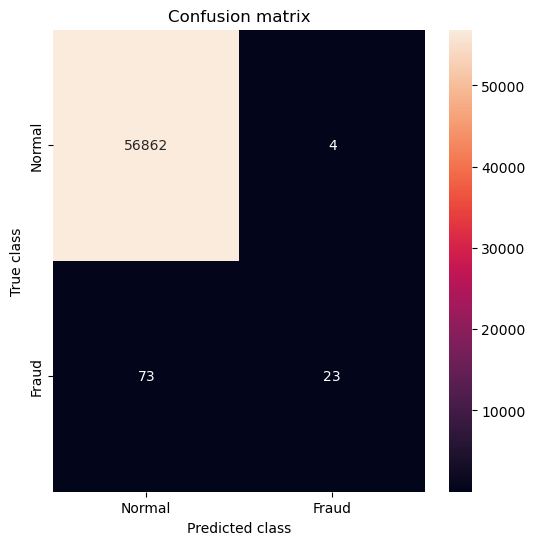

In [33]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, ypredicted) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

⭕**3. K-NN : K nearest neighbour classification:**

In [22]:
from sklearn.neighbors import KNeighborsClassifier 
n_neighbors=100
knn = KNeighborsClassifier(n_neighbors)
knn.fit(xTrain,yTrain)
ypredicted = knn.predict(xTest)

In [31]:
acc_knn = accuracy_score(yTest, ypredicted) 
print("The accuracy is {}".format(acc_knn)) 

knn_prec = precision_score(yTest, ypredicted) 
print("The precision is {}".format(prec)) 
  
knn_rec = recall_score(yTest, ypredicted) 
print("The recall is {}".format(rec)) 
  
knn_f1 = f1_score(yTest, ypredicted) 
print("The F1-Score is {}".format(f1)) 


The accuracy is 0.9986482216214319
The precision is 0.8518518518518519
The recall is 0.23958333333333334
The F1-Score is 0.3739837398373984


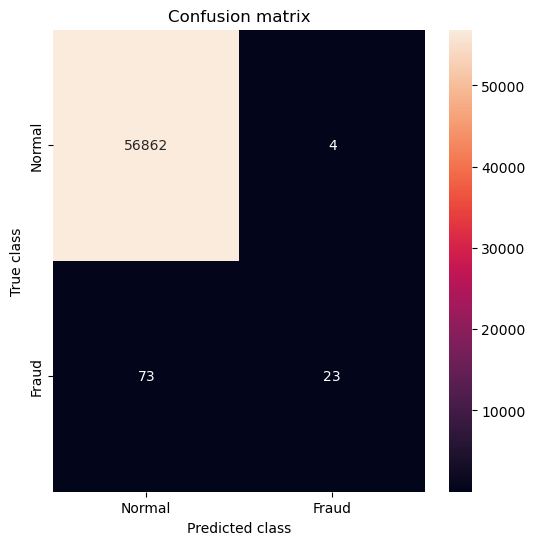

In [34]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, ypredicted) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

⭕**4. GBT: Gradient Boosted Decision Tree:**

In [25]:
from sklearn.ensemble import GradientBoostingClassifier as GBC


In [26]:
gbct = GBC(n_estimators=100,learning_rate=0.1,random_state=40)
gbct.fit(xTrain,yTrain)
y_predict = gbct.predict(xTest)


In [27]:
acc_gbt = accuracy_score(yTest,y_predict)
print("GBT Accuracy Score : ",acc_gbt)
ypredicted = y_predict
gbt_prec = precision_score(yTest, ypredicted) 
print("The precision is {}".format(prec)) 
  
gbt_rec = recall_score(yTest, ypredicted) 
print("The recall is {}".format(rec)) 
  
gbt_f1 = f1_score(yTest, ypredicted) 
print("The F1-Score is {}".format(f1)) 

GBT Accuracy Score :  0.9986482216214319
The precision is 0.8518518518518519
The recall is 0.23958333333333334
The F1-Score is 0.3739837398373984


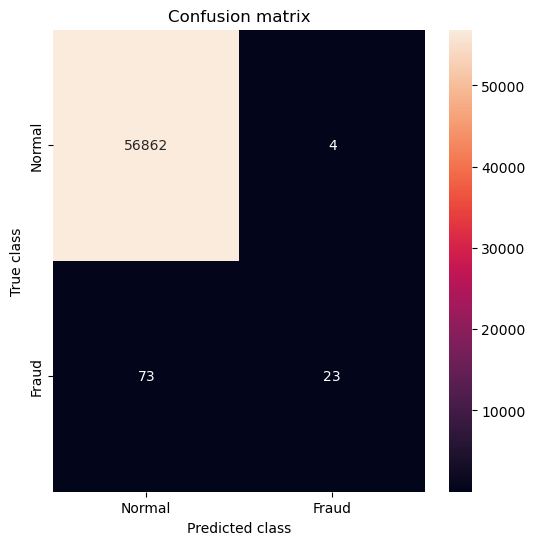

In [35]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, ypredicted) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

⭕**CONCLUSION & COMPARISION**

[0.9984375548611355, 0.9995786664794073, 0.9986482216214319, 0.9986482216214319]


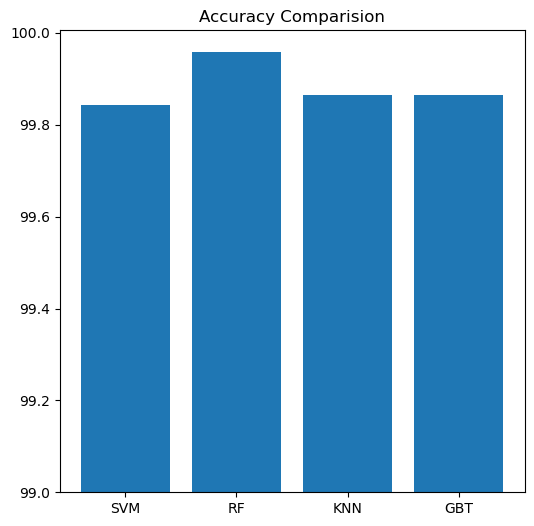

In [32]:
LABELS = ['SVM', 'RF', "KNN","GBT"] 
plt.figure(figsize =(6, 6)) 
accs = [acc_svm,acc_rf,acc_knn,acc_gbt]
print(accs)
put_acc = [(i-0.99)*100 for i in accs]

plt.bar(LABELS,put_acc,bottom=[99,99,99,99])
plt.title("Accuracy Comparision") 
plt.show()